# GARCH模型实现

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

These examples will all make use of financial data from Yahoo! Finance. This data set can be loaded from

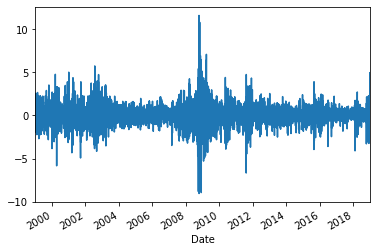

In [4]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [5]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.277818445006
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482898
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476989025
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Mar 22 2023   Df Residuals:                     5029
Time:          

<AxesSubplot:xlabel='Date'>

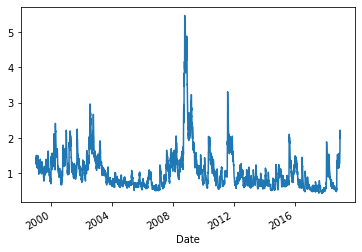

In [6]:
res.conditional_volatility.plot()

plot() can be used to quickly visualize the standardized residuals and conditional volatility.

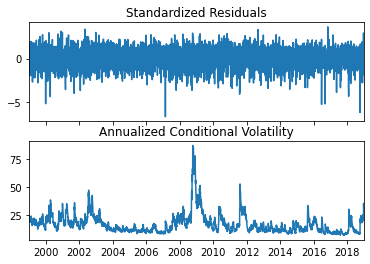

In [7]:
fig = res.plot(annualize="D")

## 1. 读取数据

使用开源API工具，可以获取指定日期内的上证指数的价格数据。

In [1]:
import tushare as ts
raw_data = ts.get_k_data(code='000096', start='2010-01-01', end='2023-01-19')
raw_data.index=raw_data['date']

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

<AxesSubplot:xlabel='date'>

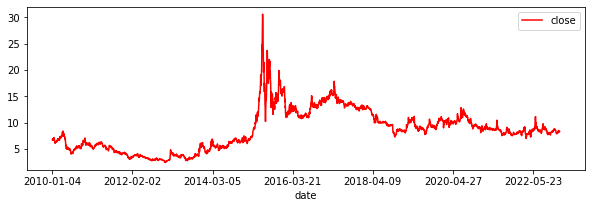

In [2]:
raw_data['close'].plot(figsize=(10,3), legend=True, color='red')

## 2.日收益率序列

In [3]:
raw_data['close'].shift(1)

date
2010-01-04     NaN
2010-01-05    6.74
2010-01-06    6.82
2010-01-07    6.82
2010-01-08    6.67
              ... 
2023-01-13    8.22
2023-01-16    8.19
2023-01-17    8.21
2023-01-18    8.30
2023-01-19    8.28
Name: close, Length: 3166, dtype: float64

In [4]:
import pandas as pd
data = pd.DataFrame()
data['close'] = raw_data['close']

In [5]:
# 日收益率
data['yesterday_close'] = raw_data['close'].shift(1)
data['daily_return'] = (data['close']-data['yesterday_close'])/data['yesterday_close']

In [6]:
# 日对数收益率
import numpy as np
data['daily_logreturn']=(data['close']/data['yesterday_close']).apply(np.log)

<AxesSubplot:xlabel='date'>

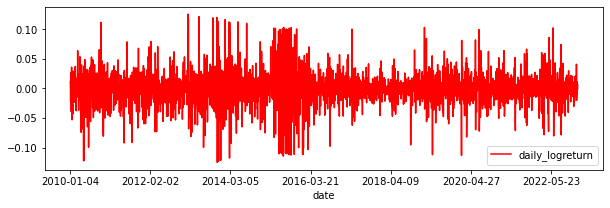

In [7]:
data['daily_logreturn'].plot(figsize=(10,3), legend=True, color='red')

In [8]:
# 周收益率
data['lastweek_close'] = raw_data['close'].shift(5)
data['week_return'] = (data['close']-data['lastweek_close'])/data['lastweek_close'] 

In [9]:
# 月收益率


In [36]:
# 均值 标准差 方差 最大值 最小值

In [37]:
junzhi=np.mean(data['close'])
print('均值：', junzhi)

均值： 8.561502689022467


In [38]:
biaozhuncha=np.std(data['close'])
print('标准差：', biaozhuncha)

标准差： 3.8607097417000094


In [39]:
fangcha=np.var(data['close'])
print('方差：', fangcha)

方差： 14.905079709657352


In [40]:
maximum=np.max(data['close'])
print('最大数据是：', maximum)

最大数据是： 30.61


In [41]:
minimum=np.min(data['close'])
print('最小数据是：', minimum)

最小数据是： 2.44


In [16]:
data=data.dropna()
data.head(10)

,close,yesterday_close,daily_return,daily_logreturn,lastweek_close,week_return
date,,,,,,
2010-01-11,6.84,6.66,0.027027,0.026668,6.74,0.014837
2010-01-12,6.98,6.84,0.020468,0.020261,6.82,0.023460
2010-01-13,6.71,6.98,-0.038682,-0.039450,6.82,-0.016129
2010-01-14,6.84,6.71,0.019374,0.019189,6.67,0.025487
2010-01-15,7.09,6.84,0.036550,0.035898,6.66,0.064565
2010-01-18,7.16,7.09,0.009873,0.009825,6.84,0.046784
2010-01-19,7.15,7.16,-0.001397,-0.001398,6.98,0.024355
2010-01-20,6.78,7.15,-0.051748,-0.053135,6.71,0.010432
2010-01-21,6.82,6.78,0.005900,0.005882,6.84,-0.002924


下面对收盘价和收益率进行绘图

<AxesSubplot:xlabel='date'>

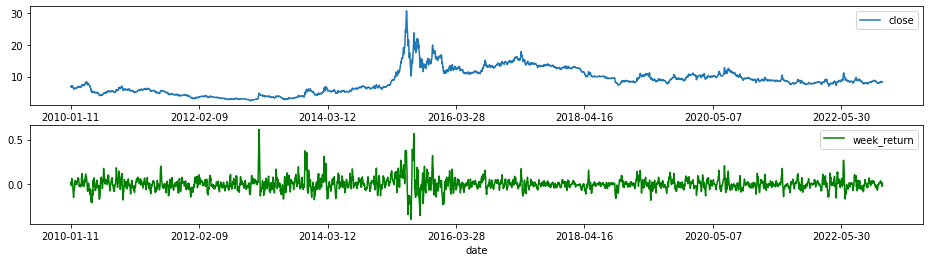

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
data[['close']].plot(figsize=(16,4), ax=ax[0])
data[['week_return']].plot(figsize=(16,4), ax=ax[1], color='green')

In [18]:
# 数据处理
data = data.dropna()

## 3. 平稳性检验

In [19]:
import statsmodels.tsa.stattools as st
adf_t, pvalue, usedlag, nobs, critical_values, icbest = \
        st.adfuller(data['daily_logreturn'])
print('adf的t统计量：', adf_t)
print('p值：', pvalue)
print('滞后阶数：', usedlag)
print('样本数：', nobs)
print('临界值：', critical_values)

adf的t统计量： -13.396419249676372
p值： 4.657628322015134e-25
滞后阶数： 22
样本数： 3138
临界值： {'1%': -3.432435614191757, '5%': -2.862461495644756, '10%': -2.5672605338292387}


## 4. 正态性检验

In [20]:
from statsmodels.stats.stattools import jarque_bera

In [21]:
_,pvalue,_, _=jarque_bera(data['daily_logreturn'].values)

In [22]:
if pvalue > 0.05:
    print('pvalue:', pvalue, '收益率序列服从正态分布。')
else:
    print('pvalue:', pvalue, '收益率序列并不服从正态分布。')

pvalue: 0.0 收益率序列并不服从正态分布。


## 5.ARCH效应检验

### 5.1 均值方程的建立

首先检验平稳性，是否需要差分。

原假设$H_0$:序列为非平稳的；
备择假设$H_1$:序列是平稳的。

In [23]:
import pandas as pd
raw_data = ts.get_k_data(code='000096', start='2010-01-01', end='2023-01-19')
data.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

,close,yesterday_close,daily_return,daily_logreturn,lastweek_close,week_return
date,,,,,,
2010-01-11,6.84,6.66,0.027027,0.026668,6.74,0.014837
2010-01-12,6.98,6.84,0.020468,0.020261,6.82,0.023460
2010-01-13,6.71,6.98,-0.038682,-0.039450,6.82,-0.016129
2010-01-14,6.84,6.71,0.019374,0.019189,6.67,0.025487
2010-01-15,7.09,6.84,0.036550,0.035898,6.66,0.064565


In [24]:
import statsmodels.api as sm
res = sm.tsa.stattools.adfuller(data['daily_logreturn'])
print('p-value', res[1])

p-value 4.657628322015134e-25


/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


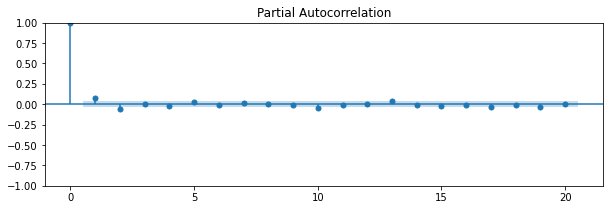

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(data['daily_logreturn'], lags=20, ax=ax1)
plt.show()

于是我们建立AR(3)模型，即均值方程：

In [26]:
order = (3, 0, 0)
model = sm.tsa.ARIMA(data['daily_logreturn'], order=order).fit()

/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 5.2 ARCH效应的检验

利用前面的金融时间序列中的混成检验（Ljung-Box），检验序列${a_t^2}$的相关性，来判断是否具有ARCH效应。

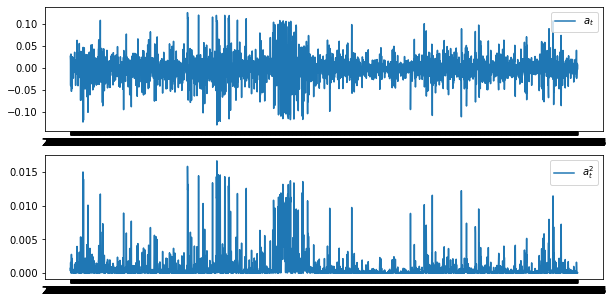

In [27]:
a_t = data['daily_logreturn'] - model.fittedvalues
import numpy as np
a_t_2 = np.square(a_t)
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(a_t, label='$a_t$')
plt.legend(loc=1)
plt.subplot(212)
plt.plot(a_t_2, label='$a_t^2$')
plt.legend(loc=1)
plt.show()

然后对${a_t^2}$进行混成检验。

原假设$H_0$:序列没有相关性；备择假设$H_1$：序列具有相关性。

In [28]:
m = 25
acf, q, p = sm.tsa.acf(a_t_2, nlags=m, qstat=True)
out = np.c_[range(1, 26), acf[1:], q, p]
output = pd.DataFrame(out, columns=['lag', "ACF", 'Q', 'P-value'])
output = output.set_index('lag')

In [29]:
output

,ACF,Q,P-value
lag,,,
1.0,0.357443,404.251214,6.538993e-90
2.0,0.322940,734.329987,3.485535e-160
3.0,0.300991,1021.155224,4.633093e-221
4.0,0.287392,1282.730906,1.846312e-276
5.0,0.279057,1529.433103,0.000000e+00
6.0,0.246429,1721.878755,0.000000e+00
7.0,0.198110,1846.294718,0.000000e+00
8.0,0.242262,2032.404642,0.000000e+00
9.0,0.238201,2212.384468,0.000000e+00


p-value小于显著性水平5%， 我们拒绝原假设，即认为序列具有相关性。因此具有ARCH效应。

## 6. 定阶

In [30]:
import statsmodels.tsa.ar_model as ar_model
import numpy as np
model = ar_model.AutoReg(data['daily_logreturn'], lags=6)
result = model.fit()
result.summary()

/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        daily_logreturn   No. Observations:                 3161
Model:                     AutoReg(6)   Log Likelihood                6630.282
Method:               Conditional MLE   S.D. of innovations              0.030
Date:                Wed, 22 Mar 2023   AIC                         -13244.563
Time:                        15:06:54   BIC                         -13196.109
Sample:                             6   HQIC                        -13227.179
                                 3161                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.704e-05      0.001      0.089      0.929      -0.001       0.001
daily_logreturn.L1     0.0876      0.018      4.918      0.000       0.053       0.122
daily_logreturn.L2    -0.0582      0.018     -3.259      0.001      -0.093      -0.023
daily_logreturn.L3     0.0091      0.018      0.511      0.609      -0.026       0.044
daily_logreturn.L4    -0.0259      0.018     -1.450      0.147      -0.061       0.009
daily_logreturn.L5     0.0284      0.018      1.592      0.111      -0.007       0.063
daily_logreturn.L6    -0.0104      0.018     -0.582      0.561      -0.045       0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4480           -1.1604j            1.8556           -0.3925
AR.2           -1.4480           +1.1604j            1.8556            0.3925
AR.3            0.4824           -1.9892j            2.0469           -0.2121
AR.4            0.4824           +1.9892j            2.0469            0.2121
AR.5            2.3379           -1.1089j            2.5875           -0.0705
AR.6            2.3379           +1.1089j            2.5875            0.0705
-----------------------------------------------------------------------------
"""

## 7.GARCH模型估计结果

In [31]:
from arch import arch_model

am = arch_model(data['daily_logreturn'])
res = am.fit(update_freq=2)
print(res.summary())

Iteration:      2,   Func. Count:     18,   Neg. LLF: 1649402.6706748956
Iteration:      4,   Func. Count:     44,   Neg. LLF: 171240627543.74435
Iteration:      6,   Func. Count:     69,   Neg. LLF: 5.590301459077239e+18
Iteration:      8,   Func. Count:     96,   Neg. LLF: 1018505882.8157824
Iteration:     10,   Func. Count:    122,   Neg. LLF: 9918071504479.621
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7072.687877489101
            Iterations: 14
            Function evaluations: 132
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:        daily_logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7072.69
Distribution:                  Normal   AIC:                          -14137.4
Method:            Maximum 

/Users/xuzhuying/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000885. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


## 7.绘制图表

In [33]:
res.conditional_volatility

date
2010-01-11    0.025716
2010-01-12    0.025958
2010-01-13    0.025575
2010-01-14    0.027295
2010-01-15    0.026690
                ...   
2023-01-13    0.020255
2023-01-16    0.019492
2023-01-17    0.018791
2023-01-18    0.018485
2023-01-19    0.017860
Name: cond_vol, Length: 3161, dtype: float64

In [34]:
res.conditional_volatility.to_csv('000096_vol.csv')

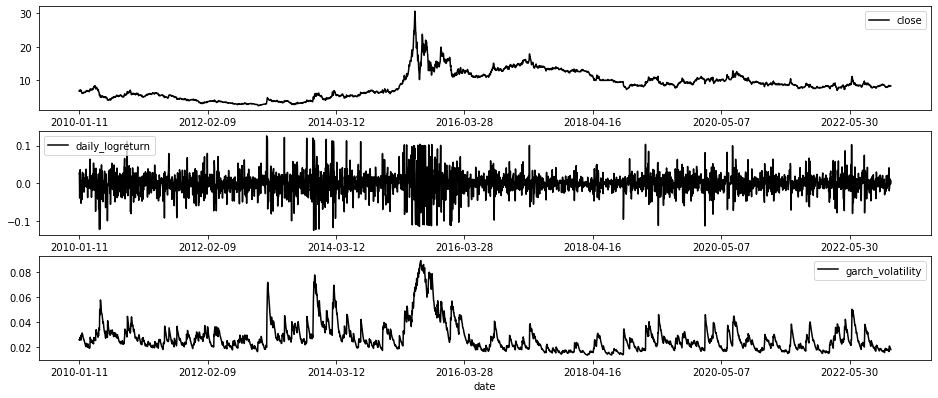

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1,figsize=(16,6.5))
data[['close']].plot(ax=ax[0],color='black')
data[['daily_logreturn']].plot(ax=ax[1], color='black')
res.conditional_volatility.plot(ax=ax[2], color='black',label='garch_volatility',legend=True)
plt.savefig('A级3on1.eps')

## 参考
链接：https://bashtage.github.io/arch/univariate/univariate_volatility_modeling.html